In [2]:
from langgraph.graph import StateGraph , START , END 
#from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from typing import TypedDict 
from dotenv import load_dotenv


In [3]:
load_dotenv()

model = ChatGroq(model="llama-3.1-8b-instant")

In [4]:
# Define State 

class pcState(TypedDict):

    topic:  str #user input
    outline: str
    blog : str
    score : int

In [5]:
def outline(state:pcState )->pcState:

    topic = state['topic']

    # Define Prompt
    prompt =f'Create outline for the above topic : {topic}'

    # Define outline
    outline = model.invoke(prompt)

    # Return the value of outline
    state['outline'] = outline

    return state

In [6]:
def blog(state:pcState)->pcState:

    topic = state['topic']
    outline = state['outline']

    # Define prompt
    prompt = f'Create the detailed blog for this topic : {topic} /n with the help of above outline:/n/n  {outline}'

    # Define Blog
    blog = model.invoke(prompt)

    # Save value of Blog in State
    state['blog'] = blog

    return state

In [7]:
def evaluate(state: pcState)->pcState:

    outline = state['outline']
    blog = state['blog']

    # Define prompt
    prompt = f'Evaluate my blog /n/n {blog} /n/n based on this above outline : {outline} /n/n and generate the only intiger score '    

    # Define the score 
    score = model.invoke(prompt)

    # Store value of score in state
    state['score'] = score

    return state

In [8]:
#define Graph
graph = StateGraph(pcState)

# Define Node
graph.add_node('outline', outline)
graph.add_node('blog',blog)
graph.add_node('evaluate',evaluate)

# Define Edge
graph.add_edge(START,'outline')
graph.add_edge('outline','blog')
graph.add_edge('blog','evaluate')
graph.add_edge('evaluate',END)

# Execute graph
workflow = graph.compile()



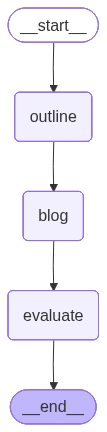

In [9]:
workflow

In [10]:
#Execite the graph

initial_state={'topic':'Tourism in INDIA '}

final_state = workflow.invoke(initial_state)

print(final_state)

{'topic': 'Tourism in INDIA ', 'outline': AIMessage(content="**I. Introduction**\n\n- Overview of Tourism in India\n- Importance of Tourism in India's Economy\n- Brief History of Tourism in India\n\n**II. Types of Tourism in India**\n\n- 1. **Heritage Tourism**\n  - Historical sites (Taj Mahal, Red Fort, Hampi)\n  - Cultural festivals (Diwali, Navratri, Holi)\n- 2. **Adventure Tourism**\n  - Trekking (Himalayas, Western Ghats)\n  - Water Sports (Goa, Kerala backwaters)\n  - Wildlife (Sundarbans, Ranthambore)\n- 3. **Eco-Tourism**\n  - National Parks and Wildlife Sanctuaries\n  - Conservation efforts (Elephant Conservation, Tiger Conservation)\n- 4. **Medical Tourism**\n  - Ayurveda and Yoga (Kerala, Goa)\n  - Modern Medical Facilities (Mumbai, Bangalore)\n- 5. **Cultural Tourism**\n  - Music and Dance (Classical, Folk)\n  - Art and Craft (Textiles, Jewelry)\n\n**III. Famous Tourist Destinations in India**\n\n- 1. **North India**\n  - Delhi\n  - Agra (Taj Mahal)\n  - Jaipur (Pink City)\

In [11]:
print(final_state['score'])

content="I'll provide an evaluation of your blog content based on its structure, content, and overall quality. I'll assign a score out of 100, with 50 being the minimum pass mark.\n\n**Content Quality:** 80/100\n\n* Your content is well-structured and easy to follow, with clear headings and subheadings.\n* You've covered various types of tourism in India, famous tourist destinations, and challenges and opportunities in the industry.\n* The information is comprehensive, but some sections could benefit from more details and supporting evidence.\n\n**Writing Style:** 70/100\n\n* Your writing is clear and concise, making it easy for readers to understand the content.\n* However, some sentences are a bit long and could be broken up for better readability.\n* The use of bullet points and numbered lists helps to make the content more engaging.\n\n**Organization:** 85/100\n\n* Your content is well-organized, with clear sections and subheadings.\n* You've used a logical structure to present the